### STAT 207 Lab 8: Regression model comparison

Due: Wednesday, October 30, 23:59:59

### Jaewon Kim jaewonk3

This lab consists of 3 main parts. You may add as many cells as you need in order to do the excercises. To add cells use the "Insert" tab from the menu bar above and select "insert cell above" or "insert cell below". 

Please use Markdown cells above or below your code cells to explain your results. Make sure graders know that you understand what your code is doing.

Note: not every problem in this lab requires Python calculation. In some cases you can just work it out and type in your solution into a Markdown cell. 

**Hint: all of the problems build on the class notes, so the notes are the first place to go for related examples and discussion.**


### Part 1: Explore the US melanoma data (8 pts)

The lab_08 folder includes the data file, "USmelanoma.csv". It contains information on the following variables for 48 states and the District of Columbia:

    mortality: number of white males died due to malignant melanoma 1950-1969 per one million inhabitants.

    latitude: latitude of the geographic center of the state.

    longitude: longitude of the geographic center of each state.

    ocean: a binary variable indicating contiguity to an ocean at levels no or yes.

**a) Read the data into a pandas data frame. Display the first 10 rows. (2 pts)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('USmelanoma.csv')
df.iloc[:10]

,state,mortality,latitude,longitude,ocean
0,Alabama,219,33.0,87.0,yes
1,Arizona,160,34.5,112.0,no
2,Arkansas,170,35.0,92.5,no
3,California,182,37.5,119.5,yes
4,Colorado,149,39.0,105.5,no
5,Connecticut,159,41.8,72.8,yes
6,Delaware,200,39.0,75.5,yes
7,District of Columbia,177,39.0,77.0,no
8,Florida,197,28.0,82.0,yes
9,Georgia,214,33.0,83.5,yes


**b) Using the seaborn function "pairplot" or otherwise, plot all the possible pairs of scatterplots between the three variables 'mortality', 'latitude' and 'longitude'. Which pair of variables appears to have the strongest association between them and it is positive or negative? (2 pts)**

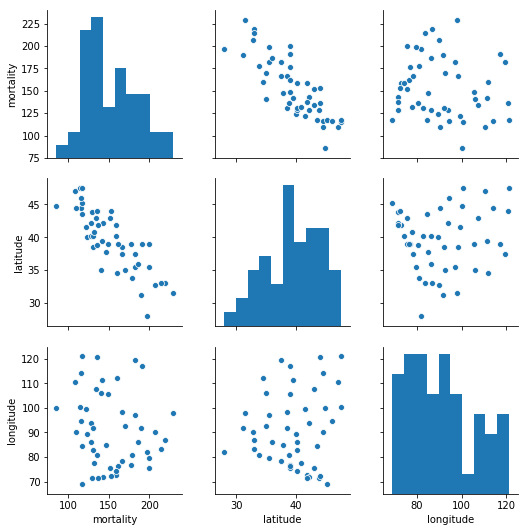

In [3]:
sns.pairplot(df)

Between mortality and latitude, there is a strong negative association.

**c) Using the pandas function .corr() or otherwise, compute the sample correlation coefficients between all possible pairs of the three variables 'mortality', 'latitude' and 'longitude'. Based on these results, which pair of variables has the strongest linear association, and it is positive or negative? (2 pts)**

In [4]:
df.corr()

,mortality,latitude,longitude
mortality,1.000000,-0.824518,-0.146188
latitude,-0.824518,1.000000,0.098974
longitude,-0.146188,0.098974,1.000000


Between mortality and latitude, there is a strong negative association.

**d) Make side by side box plots of the mortality rates for ocean contiguous states, and states that are not contiguous to an ocean. How does the distribution of mortality rates compare between the ocean states and non-ocean states? Describe briefly. (2 pts)**

Text(0, 0.5, 'Mortality')

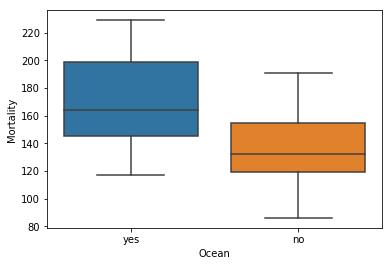

In [5]:
sns.boxplot(x = 'ocean', y = 'mortality', data = df)
plt.xlabel("Ocean")
plt.ylabel("Mortality")

The ocean states have typically higher mortality.

### Part 2: Investigate a three variable model (10 pts)

In this part we investigate the model:

$$
\mbox{mortality} = b0 + b1 * \mbox{latitude} + b2 * \mbox{longitude} + b3 * \mbox{ocean_indicator} + \mbox{error}
$$

where $b0$, $b1$, $b2$ and $b3$ are unknown regression coefficients to be estimated, and $\mbox{ocean_indicator}$ refers to a 0/1 variable inidcating whetehr or not a state is contiguous to an ocean.

**a) Use python to fit the three variable regression variable given above using ordinary least squares, and store the results. Display a summary of the model fit that includes the coefficient estimates, their standard errors, R-squared for the model, and the F-test statistic for the model. (3 pts)**

In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
result3 = smf.ols('mortality ~ latitude + longitude + ocean', data = df).fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mortality   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     50.83
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           1.70e-14
Time:                        14:40:15   Log-Likelihood:                -204.75
No. Observations:                  49   AIC:                             417.5
Df Residuals:                      45   BIC:                             425.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      349.2369     27.060     12.906      0.000     294.736     403.738
ocean[T.yes]    21.7976      5.226      4.171      0.000      11.271      32.324
latitude        -5.4950      0.529    -10.390      0.000      -6.560      -4.430
longitude        0.1219      0.173      0.704      0.485      -0.227       0.471
==============================================================================
Omnibus:                        2.010   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.366   Jarque-Bera (JB):                1.485
Skew:                           0.425   Prob(JB):                        0.476
Kurtosis:                       3.058   Cond. No.                     1.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**b) Write down the null hypothesis, $H_0$, for the F-statistic reported in the summary of the results. Be sure to express $H_0$ in terms of the model coefficients. Is $H_0$ rejected at the level $\alpha=0.01$? (2 pts)**

$H_0$:  b1 = b2 = b3 = 0

$H_0$ will be rejected at the level $\alpha = 0.01$.

**c) For each of the three exogenous variables, state whether or not the coefficient is statistically signficantly different from zero, at level $\alpha=0.05$, based on your results. Explain how you know. (2 pts)**

For ocean and latitude, the coefficient is statistically significant. However, longitude is not significantly different than 0.

**d) Using python, plot the residuals from this model versus the fitted values. Comment on whether the plot appears random or has any anomalies of concern. (3 pts)**

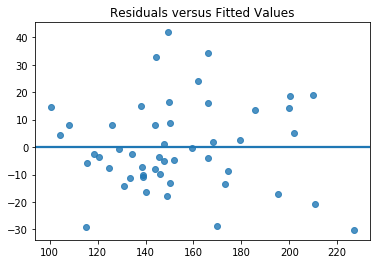

In [7]:
sns.regplot(x = result3.fittedvalues, y = result3.resid, ci = None)
plt.title('Residuals versus Fitted Values')
plt.show()

The plot appears to be random. 

### Part 3: Compare a two variable model (7 pts)

**a) Use python to fit the two-variable model that omits the exogenous variable, 'longitude' from the three variable model given above using ordinary least squares regression. Display a summary of the model fit that includes the coefficient estimates, their standard errors, R-squared for the model, and the F-test statistic for the model. (3 pts)**

In [8]:
result2 = smf.ols('mortality ~ ocean + latitude', data = df).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mortality   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     76.83
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           2.17e-15
Time:                        14:40:15   Log-Likelihood:                -205.02
No. Observations:                  49   AIC:                             416.0
Df Residuals:                      46   BIC:                             421.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      360.6905     21.498     16.778      0.000     317.417     403.964
ocean[T.yes]    20.4304      4.825      4.234      0.000      10.718      30.143
latitude        -5.4888      0.526    -10.437      0.000      -6.547      -4.430
==============================================================================
Omnibus:                        2.146   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.342   Jarque-Bera (JB):                1.576
Skew:                           0.437   Prob(JB):                        0.455
Kurtosis:                       3.084   Cond. No.                         367.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**b) Use the statsmodel.stats.anova function 'anova_lm' to compute an F test for testing the null hypothesis that the two variable model is correct, versus the alternative that the three variable model is required. Is the test significant at level $\alpha=0.10$? (3 pts)**

Note: Often this function generates a warning related to NaN's in the output. This warning can be ignored, as the NaN's are valid in the output table.

In [9]:
from statsmodels.stats.anova import anova_lm
from scipy.stats import f
aov = anova_lm(result2, result3)
aov

C:\Users\jaewo\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\jaewo\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\jaewo\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,46.0,12357.001633,0.0,NaN,NaN,NaN
1,45.0,12222.501292,1.0,134.500341,0.495194,0.485245


The two variable model and the three model do not have a significant difference since P value is bigger than 0.10.

**c) Show numerically that the F test statistic computed in Part 3b) is equal to the square of the t statistic for the coefficient of 'longitude' in the three variable model. (1 pt)**

In [10]:
F = aov.iloc[1]['F']
t = result3.t_test('longitude')
print('F-test statistics:', F)
print('Square of t statistics:', np.square(t))

F-test statistics: 0.4951944941097335
Square of t statistics: [[0.49519449]]


Based on the result above, the F test statistic and the square of the t statistic for coefficient of longitude in the three variable model are numerically equal.